In [41]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
import seaborn as sns
from prettytable import PrettyTable
from scipy.stats import multivariate_normal
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from joblib import dump
from joblib import load
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier
from sklearn.metrics import log_loss, roc_auc_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers


In [42]:
#data reading
df = pd.read_csv("/kaggle/input/plc-data-model9/plcdata.csv")
df.head()

,PLC Current cycle time,PLC The shortest cycle time,PLC The longest cycle time,PLC Min runtime,PLC Max runtime,PLC Running Status,Current_time,Pump Speed,SG lEVEL,Year,Month,Day,Hour,Minute,Second,Millisecond,label
0,1011005,1001561,0,0,2063000,True,20:56.8,100.0,14.206157,2024,1,22,16,20,56,779,Normal
1,1137466,1001561,0,0,2063000,True,20:56.8,100.0,14.206157,2024,1,22,16,20,56,785,Normal
2,1010157,1001561,0,0,2063000,True,20:56.8,100.0,14.206157,2024,1,22,16,20,56,792,Normal
3,1021972,1001561,0,0,2063000,True,20:56.8,100.0,14.205319,2024,1,22,16,20,56,800,Normal
4,1032655,1001561,0,0,2063000,True,20:56.8,100.0,14.205319,2024,1,22,16,20,56,807,Normal


In [43]:
# Assuming you have a DataFrame called df
missing_values = df.isna()  # or df.isnull()

# Count the number of missing values in each column
missing_count = missing_values.sum()

# Display the count of missing values per column
print(missing_count)

PLC Current cycle time         0
PLC The shortest cycle time    0
PLC The longest cycle time     0
PLC Min runtime                0
PLC Max runtime                0
PLC Running Status             0
Current_time                   0
Pump Speed                     0
SG lEVEL                       0
Year                           0
Month                          0
Day                            0
Hour                           0
Minute                         0
Second                         0
Millisecond                    0
label                          0
dtype: int64


In [44]:
print(df['PLC Running Status'].value_counts())

PLC Running Status
True     20680
False     4321
Name: count, dtype: int64


In [45]:

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'PLC Running Status' column
df['PLC Running Status'] = label_encoder.fit_transform(df['PLC Running Status'])


# Assuming combined_df is your combined dataframe containing both normal and abnormal data

# Rename the column 'OldColumnName' to 'NewColumnName'
df.rename(columns={'Label': 'label'}, inplace=True)

# Invert the labels
df['PLC Running Status'] = 1 - df['PLC Running Status']


# Display the modified dataframe
df.head()

,PLC Current cycle time,PLC The shortest cycle time,PLC The longest cycle time,PLC Min runtime,PLC Max runtime,PLC Running Status,Current_time,Pump Speed,SG lEVEL,Year,Month,Day,Hour,Minute,Second,Millisecond,label
0,1011005,1001561,0,0,2063000,0,20:56.8,100.0,14.206157,2024,1,22,16,20,56,779,Normal
1,1137466,1001561,0,0,2063000,0,20:56.8,100.0,14.206157,2024,1,22,16,20,56,785,Normal
2,1010157,1001561,0,0,2063000,0,20:56.8,100.0,14.206157,2024,1,22,16,20,56,792,Normal
3,1021972,1001561,0,0,2063000,0,20:56.8,100.0,14.205319,2024,1,22,16,20,56,800,Normal
4,1032655,1001561,0,0,2063000,0,20:56.8,100.0,14.205319,2024,1,22,16,20,56,807,Normal


In [46]:
print(df['PLC Running Status'].value_counts())

PLC Running Status
0    20680
1     4321
Name: count, dtype: int64


In [47]:
def features_ext(df):
    # Create a new column 'CycleTimeDifference' to store the differences in 'PLC Current cycle time'
    df['CycleTimeDifference'] = df['PLC Current cycle time'].diff()
    # Create a new column 'MaxRuntimeRatio' by dividing 'PLC Max runtime' by 'PLC Current cycle time'
    df['MaxRuntimeRatio'] = df['PLC Max runtime'] / df['PLC Current cycle time']

    df['longestimetimeRatio'] = df['PLC The longest cycle time'] / df['PLC Current cycle time']
    
  
    #df["sd_runtime_ratio"] = np.std(df["MaxRuntimeRatio"])

    # Ratio between Pump Speed and lEVEL
    #df["level_ratio"] = df["PLC Current cycle time"] / df["SG lEVEL"]

    # Ensure positive values for 'CycleTimeDifference' and 'MaxRuntimeRatio'
    df['CycleTimeDifference'] = df['CycleTimeDifference'].fillna(0).abs()  # Fill NaN (first row) with 0 and take absolute value
    df['MaxRuntimeRatio'] = df['MaxRuntimeRatio'].abs()  # Take absolute value for 'MaxRuntimeRatio'
    df['longestimetimeRatio'] = df['longestimetimeRatio'].abs()
    
    
    df['cycle_maxrun'] = df['CycleTimeDifference'] / df['MaxRuntimeRatio']
    # Rearrange columns to put 'label' column at the end
    df = df[[col for col in df if col != 'label'] + ['label']]
    # Map TRUE to 0 and FALSE to 1 in the 'PLC Running Status' column
  
    return df
df = features_ext(df)
df

,PLC Current cycle time,PLC The shortest cycle time,PLC The longest cycle time,PLC Min runtime,PLC Max runtime,PLC Running Status,Current_time,Pump Speed,SG lEVEL,Year,...,Day,Hour,Minute,Second,Millisecond,CycleTimeDifference,MaxRuntimeRatio,longestimetimeRatio,cycle_maxrun,label
0,1011005,1001561,0,0,2063000,0,20:56.8,100.0,14.206157,2024,...,22,16,20,56,779,0.0,2.040544,0.0,0.000000,Normal
1,1137466,1001561,0,0,2063000,0,20:56.8,100.0,14.206157,2024,...,22,16,20,56,785,126461.0,1.813681,0.0,69726.169571,Normal
2,1010157,1001561,0,0,2063000,0,20:56.8,100.0,14.206157,2024,...,22,16,20,56,792,127309.0,2.042257,0.0,62337.410331,Normal
3,1021972,1001561,0,0,2063000,0,20:56.8,100.0,14.205319,2024,...,22,16,20,56,800,11815.0,2.018646,0.0,5852.932225,Normal
4,1032655,1001561,0,0,2063000,0,20:56.8,100.0,14.205319,2024,...,22,16,20,56,807,10683.0,1.997763,0.0,5347.481030,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24996,1011168,1001561,0,0,2063000,0,23:45.9,100.0,14.794104,2024,...,22,16,23,45,872,1613.0,2.040215,0.0,790.602998,Normal
24997,1009898,1001561,0,0,2063000,0,23:45.9,100.0,14.794104,2024,...,22,16,23,45,878,1270.0,2.042781,0.0,621.701629,Normal
24998,1338167,1001561,0,0,2063000,0,23:45.9,100.0,14.794104,2024,...,22,16,23,45,884,328269.0,1.541661,0.0,212932.013050,Normal
24999,1292647,1001561,0,0,2063000,0,23:45.9,100.0,14.794104,2024,...,22,16,23,45,891,45520.0,1.595950,0.0,28522.196529,Normal


In [48]:
df.columns

Index(['PLC Current cycle time', 'PLC The shortest cycle time',
       'PLC The longest cycle time', 'PLC Min runtime', 'PLC Max runtime',
       'PLC Running Status', 'Current_time', 'Pump Speed', 'SG lEVEL', 'Year',
       'Month', 'Day', 'Hour', 'Minute', 'Second', 'Millisecond',
       'CycleTimeDifference', 'MaxRuntimeRatio', 'longestimetimeRatio',
       'cycle_maxrun', 'label'],
      dtype='object')

In [49]:
numeric_columns = ['PLC Current cycle time',
       'PLC Running Status', 'Pump Speed', 'SG lEVEL',
       'CycleTimeDifference', 'MaxRuntimeRatio', 
       'cycle_maxrun', 'label']

df2 = df[numeric_columns]

In [50]:
df.columns

Index(['PLC Current cycle time', 'PLC The shortest cycle time',
       'PLC The longest cycle time', 'PLC Min runtime', 'PLC Max runtime',
       'PLC Running Status', 'Current_time', 'Pump Speed', 'SG lEVEL', 'Year',
       'Month', 'Day', 'Hour', 'Minute', 'Second', 'Millisecond',
       'CycleTimeDifference', 'MaxRuntimeRatio', 'longestimetimeRatio',
       'cycle_maxrun', 'label'],
      dtype='object')

In [51]:
numeric_columns = ['CycleTimeDifference','Pump Speed',
       'PLC Running Status','MaxRuntimeRatio','cycle_maxrun']
def preprocessing(df, numeric_columns):
    # Map TRUE to 0 and FALSE to 1 in the 'PLC Running Status' column
    # Initialize LabelEncoder
    label_encoder = LabelEncoder()

    # Fit and transform the 'PLC Running Status' column
    df['PLC Running Status'] = label_encoder.fit_transform(df['PLC Running Status'])
    # Copy of dataframe
    data = df.copy()
    # Apply label encoding
    #data['PLC Running Status'] = data['PLC Running Status'].apply(lambda x: 0 if x == 8 else 1)
    
    # Convert labels to numeric form using label encoding
    label_encoder = LabelEncoder()
    # Fit and transform the 'Label' column
    data['label'] = label_encoder.fit_transform(data['label'])

    # Invert the labels
    data['label'] = 1 - data['label']
    y = data['label']
     # Drop non-numeric columns and convert IP columns to numerical form (using dummy variables)
    data = data[numeric_columns]
    
    dataframe = data.copy()
    
    # Convert the list to a NumPy array
    labels = np.array(y)
    # Get values from dataset
    raw_data = data.values
    # Get values not last column which is target column
    data = raw_data[:, :-1]
    # Normalization of data
    data = ((data - data.min()) / (data.max() - data.min())) * 5
    return dataframe, data, labels,y
#output of the function (dataframe)
dataframe,data,labels,y = preprocessing(df,numeric_columns)
dataframe    

,CycleTimeDifference,Pump Speed,PLC Running Status,MaxRuntimeRatio,cycle_maxrun
0,0.0,100.0,0,2.040544,0.000000
1,126461.0,100.0,0,1.813681,69726.169571
2,127309.0,100.0,0,2.042257,62337.410331
3,11815.0,100.0,0,2.018646,5852.932225
4,10683.0,100.0,0,1.997763,5347.481030
...,...,...,...,...,...
24996,1613.0,100.0,0,2.040215,790.602998
24997,1270.0,100.0,0,2.042781,621.701629
24998,328269.0,100.0,0,1.541661,212932.013050
24999,45520.0,100.0,0,1.595950,28522.196529


In [52]:
#shape of the data
data.shape

(25001, 4)

Epoch 1/50
895/895 [==============================] - 3s 3ms/step - loss: 0.5875 - accuracy: 0.7340 - val_loss: 0.5349 - val_accuracy: 0.6931
Epoch 2/50
895/895 [==============================] - 2s 2ms/step - loss: 0.5181 - accuracy: 0.7900 - val_loss: 0.5045 - val_accuracy: 0.7368
Epoch 3/50
895/895 [==============================] - 2s 2ms/step - loss: 0.4740 - accuracy: 0.8176 - val_loss: 0.4286 - val_accuracy: 0.7877
Epoch 4/50
895/895 [==============================] - 2s 2ms/step - loss: 0.4500 - accuracy: 0.8319 - val_loss: 0.4045 - val_accuracy: 0.8171
Epoch 5/50
895/895 [==============================] - 2s 2ms/step - loss: 0.4282 - accuracy: 0.8440 - val_loss: 0.3924 - val_accuracy: 0.8264
Epoch 6/50
895/895 [==============================] - 2s 2ms/step - loss: 0.4124 - accuracy: 0.8525 - val_loss: 0.3466 - val_accuracy: 0.8581
Epoch 7/50
895/895 [==============================] - 2s 2ms/step - loss: 0.3958 - accuracy: 0.8614 - val_loss: 0.4057 - val_accuracy: 0.8312
Epoch 

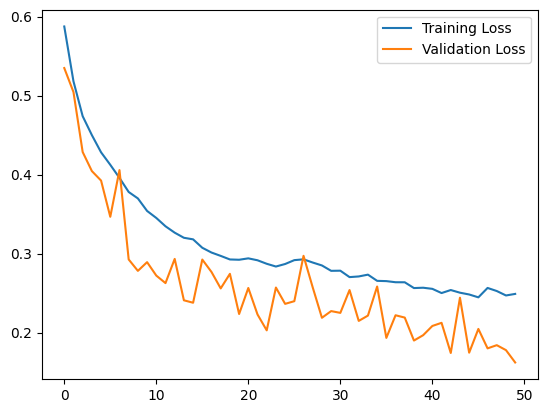

118/118 [==============================] - 0s 1ms/step - loss: 0.1621 - accuracy: 0.9672


In [53]:
def neural_networks(data, labels):
    X = data
    y = labels

    # Split data into training, validation, and test sets
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
   

    #undersample = RandomUnderSampler(random_state=42)
    #X_train, y_train = undersample.fit_resample(X_train, y_train)
    # Apply SMOTE for oversampling on training data
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)

    # Build a simple neural network model
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X.shape[1],)),  # Replace num_features with the actual number of features
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))
    #plot training loss and validation loss
    plt.plot(history.history["loss"], label="Training Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.legend()
    # Save the plot
    plt.savefig('loss_plot.png')  # Change the file extension and name as needed
    plt.show()
    # Evaluate the model on the test set
    y_pred = model.predict(X_test)
    # Evaluate the model on the validation set
    nn_val_loss, nn_val_accuracy = model.evaluate(X_val, y_val)
    y_pred_binary = (y_pred > 0.5).astype(int)
    nn_predictions = y_pred_binary
    # Print evaluation metrics or use an existing function
    #print_stats(y_pred_binary, y_test)
    # Assuming your neural network model is defined in the neural_networks function
    # Train the neural network model and save it
   
    model.save("neural_network_model.h5")

    return nn_predictions,nn_val_loss, nn_val_accuracy,y_pred


# Example usage
nn_predictions,nn_val_loss, nn_val_accuracy,y_pred = neural_networks(data, labels)

In [54]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


def machine_learning_data(data, labels,nn_predictions,nn_val_loss, nn_val_accuracy,y_pred):
    X = data
    y = labels

    # Split data into training, validation, and test sets
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    
    #undersample = RandomUnderSampler(random_state=42)
    #X_train, y_train = undersample.fit_resample(X_train, y_train)
    ## Apply SMOTE for oversampling on training data
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    
    # Calculate and print the sizes of the datasets
    size_X = len(X)
    size_X_train = len(X_train)
    size_X_val = len(X_val)
    size_X_test = len(X_test)

    print(f"Size of the original dataset (X): {size_X}")
    print(f"Size of the training set (X_train): {size_X_train}")
    print(f"Size of the validation set (X_val): {size_X_val}")
    print(f"Size of the test set (X_test): {size_X_test}")
    
    # Initialize machine learning models with adjusted training data
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1)
    svm_model = SVC(C=1.0, kernel='rbf', gamma='scale')
    gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
    lr_model = LogisticRegression(C=1.0, solver='lbfgs')
    xgboost_model = XGBClassifier(objective='binary:logistic')

    # Train machine learning models with resampled data
    rf_model.fit(X_train, y_train)
    svm_model.fit(X_train, y_train)
    gb_model.fit(X_train, y_train)
    lr_model.fit(X_train, y_train)
    xgboost_model.fit(X_train, y_train)
    # ... (rest of your code remains the same)
            # Save each scikit-learn model
    dump(rf_model, 'random_forest_model.joblib')
    dump(svm_model, 'svm_model.joblib')
    dump(gb_model, 'gradient_boosting_model.joblib')
    dump(lr_model, 'logistic_regression_model.joblib')
    dump(xgboost_model, 'xgboost_model.joblib')
    
    # Predictions for machine learning models on validation and test sets
    rf_val_predictions = rf_model.predict(X_val)
    svm_val_predictions = svm_model.predict(X_val)
    gb_val_predictions = gb_model.predict(X_val)
    lr_val_predictions = lr_model.predict(X_val)
    xgboost_val_predictions = xgboost_model.predict(X_val)
    
    # Evaluate metrics for machine learning models on validation set
    rf_val_accuracy = accuracy_score(y_val, rf_val_predictions)
    svm_val_accuracy = accuracy_score(y_val, svm_val_predictions)
    gb_val_accuracy = accuracy_score(y_val, gb_val_predictions)
    lr_val_accuracy = accuracy_score(y_val, lr_val_predictions)
    xgboost_val_accuracy = accuracy_score(y_val, xgboost_val_predictions)
    
    # Predictions for machine learning models on test set
    rf_predictions = rf_model.predict(X_test)
    svm_predictions = svm_model.predict(X_test)
    gb_predictions = gb_model.predict(X_test)
    lr_predictions = lr_model.predict(X_test)
    xgboost_predictions = xgboost_model.predict(X_test)
    
    # Evaluate metrics for machine learning models on test set
    rf_accuracy = accuracy_score(y_test, rf_predictions)
    svm_accuracy = accuracy_score(y_test, svm_predictions)
    gb_accuracy = accuracy_score(y_test, gb_predictions)
    lr_accuracy = accuracy_score(y_test, lr_predictions)
    xgboost_accuracy = accuracy_score(y_test, xgboost_predictions)

    # Now, include the neural network model
    # Assuming neural_networks function is already defined and returns y_pred_binary
    #nn_predictions,nn_val_loss, nn_val_accuracy,y_pred = neural_networks(data, labels)
    
  
    # Evaluate metrics for the neural network model
    nn_accuracy = accuracy_score(y_test, nn_predictions)
    nn_precision = precision_score(y_test, nn_predictions)
    nn_recall = recall_score(y_test, nn_predictions)
    nn_f1 = f1_score(y_test, nn_predictions)
    nn_roc_auc = roc_auc_score(y_test, nn_predictions)
    
    
    # Print results for machine learning models
    print("\nMachine Learning Model Accuracy Scores on Validation Set:")
    print("-------------------------------------")
    print("-------------------------------------")
    print(f"Random Forest: {rf_val_accuracy:.5f}")
    print(f"SVM: {svm_val_accuracy:.5f}")
    print(f"Gradient Boosting: {gb_val_accuracy:.5f}")
    print(f"Logistic Regression: {lr_val_accuracy:.5f}")
    print(f"XGBoost: {xgboost_val_accuracy:.5f}")
    print(f"Neural Network (Validation): {nn_val_accuracy:.5f}\n")
    print("-------------------------------------")
    print("-------------------------------------")

    # Print results for machine learning models
    print("\nMachine Learning Model Accuracy Scores on Test Set:")
    print("-------------------------------------")
    print("-------------------------------------\n")
    print(f"Random Forest: {rf_accuracy:.5f}")
    print(f"SVM: {svm_accuracy:.5f}")
    print(f"Gradient Boosting: {gb_accuracy:.5f}")
    print(f"Logistic Regression: {lr_accuracy:.5f}")
    print(f"XGBoost: {xgboost_accuracy:.5f}")
    print(f"Neural Network: {nn_accuracy:.5f}\n")
    print("-------------------------------------")
    print("-------------------------------------\n")


    '''
    # Print results for the neural network model
    print("Neural Network Model Metrics:")
    print(f"Accuracy: {nn_accuracy}")
    print(f"Precision: {nn_precision}")
    print(f"Recall: {nn_recall}")
    print(f"F1-score: {nn_f1}")
    print(f"ROC AUC: {nn_roc_auc}")'''
    return X_train, X_temp, y_train, y_temp,X_val, X_test, y_val, y_test,rf_val_accuracy,svm_val_accuracy,gb_val_accuracy,lr_val_accuracy,xgboost_val_accuracy,rf_val_predictions,svm_val_predictions,gb_val_predictions,lr_val_predictions,xgboost_val_predictions,rf_predictions,svm_predictions,gb_predictions,lr_predictions,xgboost_predictions,nn_predictions,y_test,rf_accuracy,svm_accuracy,gb_accuracy,lr_accuracy,xgboost_accuracy,nn_accuracy
# Example usage
# machine_learning_data(data, labels)
#model score comperation
X_train, X_temp, y_train, y_temp,X_val, X_test, y_val, y_test,rf_val_accuracy,svm_val_accuracy,gb_val_accuracy,lr_val_accuracy,xgboost_val_accuracy,rf_val_predictions,svm_val_predictions,gb_val_predictions,lr_val_predictions,xgboost_val_predictions,rf_predictions,svm_predictions,gb_predictions,lr_predictions,xgboost_predictions,nn_predictions,y_test,rf_accuracy,svm_accuracy,gb_accuracy,lr_accuracy,xgboost_accuracy,nn_accuracy = machine_learning_data(data, labels,nn_predictions,nn_val_loss, nn_val_accuracy,y_pred)

Size of the original dataset (X): 25001
Size of the training set (X_train): 28622
Size of the validation set (X_val): 3750
Size of the test set (X_test): 3751

Machine Learning Model Accuracy Scores on Validation Set:
-------------------------------------
-------------------------------------
Random Forest: 0.98560
SVM: 0.72213
Gradient Boosting: 0.98640
Logistic Regression: 0.57333
XGBoost: 0.98933
Neural Network (Validation): 0.96720

-------------------------------------
-------------------------------------

Machine Learning Model Accuracy Scores on Test Set:
-------------------------------------
-------------------------------------

Random Forest: 0.98480
SVM: 0.72434
Gradient Boosting: 0.98454
Logistic Regression: 0.57291
XGBoost: 0.98960
Neural Network: 0.96721

-------------------------------------
-------------------------------------



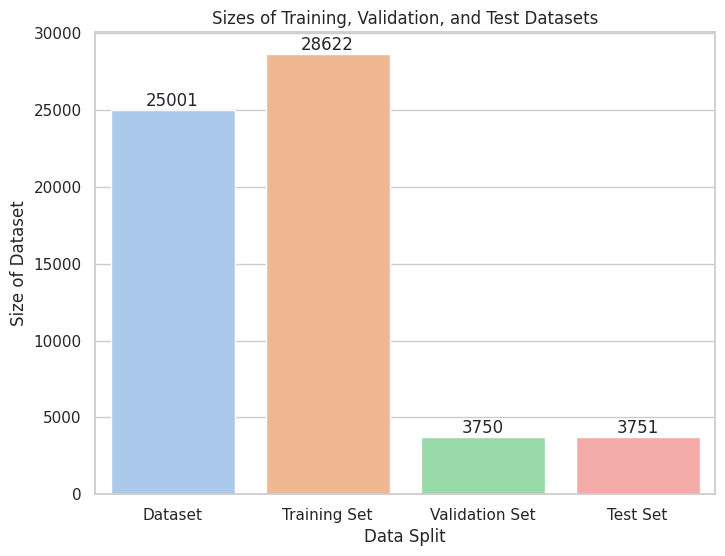

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the lengths of each dataset

size_X = len(data)
train_length = len(X_train)
val_length = len(X_val)
test_length = len(X_test)

# Create labels for the bar plot
labels = ['Dataset','Training Set', 'Validation Set', 'Test Set']
sizes = [size_X,train_length, val_length, test_length]

# Set the style for the plot
sns.set(style='whitegrid', palette='pastel')

# Plotting the bar plot using Seaborn
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=labels, y=sizes)
plt.xlabel('Data Split')
plt.ylabel('Size of Dataset')
plt.title('Sizes of Training, Validation, and Test Datasets')

# Annotate each bar with its value
for i, size in enumerate(sizes):
    ax.text(i, size + 10, str(size), ha='center', va='bottom', fontsize=12)
output_path = '/kaggle/working/Sizes_of_Train_Val_Test_Datasets.png'
plt.savefig(output_path, bbox_inches='tight')
plt.show()


In [56]:
# Print the sizes
print(f"Size of the original dataset (X): {size_X}")
print(f"Size of the training set (X_train): {train_length}")
print(f"Size of the validation set (X_val): {val_length}")
print(f"Size of the test set (X_test): {test_length}")

Size of the original dataset (X): 25001
Size of the training set (X_train): 28622
Size of the validation set (X_val): 3750
Size of the test set (X_test): 3751


In [57]:
def results_machine_learning(y_test,rf_predictions,svm_predictions,gb_predictions,lr_predictions,xgboost_predictions):
    

    # Calculate evaluation metrics
    rf_precision = precision_score(y_test, rf_predictions)
    rf_recall = recall_score(y_test, rf_predictions)
    rf_f1 = f1_score(y_test, rf_predictions)
    rf_roc_auc = roc_auc_score(y_test, rf_predictions)

    svm_precision = precision_score(y_test, svm_predictions)
    svm_recall = recall_score(y_test, svm_predictions)
    svm_f1 = f1_score(y_test, svm_predictions)
    svm_roc_auc = roc_auc_score(y_test, svm_predictions)

    gb_precision = precision_score(y_test, gb_predictions)
    gb_recall = recall_score(y_test, gb_predictions)
    gb_f1 = f1_score(y_test, gb_predictions)
    gb_roc_auc = roc_auc_score(y_test, gb_predictions)

    lr_precision = precision_score(y_test, lr_predictions)
    lr_recall = recall_score(y_test, lr_predictions)
    lr_f1 = f1_score(y_test, lr_predictions)
    lr_roc_auc = roc_auc_score(y_test, lr_predictions)
    
    xgboost_precision = precision_score(y_test, xgboost_predictions)
    xgboost_recall = recall_score(y_test, xgboost_predictions)
    xgboost_f1 = f1_score(y_test, xgboost_predictions)
    xgboost_roc_auc = roc_auc_score(y_test, xgboost_predictions)
    
    # Evaluate metrics for the neural network model
    nn_accuracy = accuracy_score(y_test, nn_predictions)
    nn_precision = precision_score(y_test, nn_predictions)
    nn_recall = recall_score(y_test, nn_predictions)
    nn_f1 = f1_score(y_test, nn_predictions)
    nn_roc_auc = roc_auc_score(y_test, nn_predictions)
        # Create a dictionary to store the metrics
    results = {
        'Random Forest': {
            'Precision': rf_precision,
            'Recall': rf_recall,
            'F1-score': rf_f1,
            'ROC AUC': rf_roc_auc
        },
        'SVM': {
            'Precision': svm_precision,
            'Recall': svm_recall,
            'F1-score': svm_f1,
            'ROC AUC': svm_roc_auc
        },
        'Gradient Boosting': {
            'Precision': gb_precision,
            'Recall': gb_recall,
            'F1-score': gb_f1,
            'ROC AUC': gb_roc_auc
        },
        'Logistic Regression': {
            'Precision': lr_precision,
            'Recall': lr_recall,
            'F1-score': lr_f1,
            'ROC AUC': lr_roc_auc
        },
        'XGBoost': {
            'Precision': xgboost_precision,
            'Recall': xgboost_recall,
            'F1-score': xgboost_f1,
            'ROC AUC': xgboost_roc_auc
        },
        'Neural Network': {
            'Precision': nn_precision,
            'Recall': nn_recall,
            'F1-score': nn_f1,
            'ROC AUC': nn_roc_auc
        }
    }

    # Print the metrics for each model
    print("Random Forest Metrics:")
    print(f"Accuracy: {rf_accuracy:.5f}")
    print(f"Precision: {rf_precision:.5f}")
    print(f"Recall: {rf_recall:.5f}")
    print(f"F1-score: {rf_f1:.5f}")
    print(f"ROC AUC: {rf_roc_auc:.5f}")

    print("\nSVM Metrics:")
    print(f"Accuracy: {svm_accuracy:.5f}")
    print(f"Precision: {svm_precision:.5f}")
    print(f"Recall: {svm_recall:.5f}")
    print(f"F1-score: {svm_f1:.5f}")
    print(f"ROC AUC: {svm_roc_auc:.5f}")

    print("\nGradient Boosting Metrics:")
    print(f"Accuracy: {gb_accuracy:.5f}")
    print(f"Precision: {gb_precision:.5f}")
    print(f"Recall: {gb_recall:.5f}")
    print(f"F1-score: {gb_f1:.5f}")
    print(f"ROC AUC: {gb_roc_auc:.5f}")

    print("\nLogistic Regression Metrics:")
    print(f"Accuracy: {lr_accuracy:.5f}")
    print(f"Precision: {lr_precision:.5f}")
    print(f"Recall: {lr_recall:.5f}")
    print(f"F1-score: {lr_f1:.5f}")
    print(f"ROC AUC: {lr_roc_auc:.5f}")
    
    print("\nXGBoost Metrics:")
    print(f"Accuracy: {xgboost_accuracy:.5f}")
    print(f"Precision: {xgboost_precision:.5f}")
    print(f"Recall: {xgboost_recall:.5f}")
    print(f"F1-score: {xgboost_f1:.5f}")
    print(f"ROC AUC: {xgboost_roc_auc:.5f}")
    
    
    print("\nNeural Network Model Metrics:")
    print(f"Accuracy: {nn_accuracy:.5f}")
    print(f"Precision: {nn_precision:.5f}")
    print(f"Recall: {nn_recall:.5f}")
    print(f"F1-score: {nn_f1:.5f}")
    print(f"ROC AUC: {nn_roc_auc:.5f}")
    return results,rf_precision,rf_recall,rf_f1,rf_roc_auc,svm_precision,svm_recall,svm_f1,svm_roc_auc,gb_precision,gb_recall,gb_f1,gb_roc_auc,lr_precision,lr_recall,lr_f1,lr_roc_auc,xgboost_precision,xgboost_recall,xgboost_f1,xgboost_roc_auc,nn_accuracy,nn_precision,nn_recall,nn_f1,nn_roc_auc 
results,rf_precision,rf_recall,rf_f1,rf_roc_auc,svm_precision,svm_recall,svm_f1,svm_roc_auc,gb_precision,gb_recall,gb_f1,gb_roc_auc,lr_precision,lr_recall,lr_f1,lr_roc_auc,xgboost_precision,xgboost_recall,xgboost_f1,xgboost_roc_auc,nn_accuracy,nn_precision,nn_recall,nn_f1,nn_roc_auc  =results_machine_learning(y_test,rf_predictions,svm_predictions,gb_predictions,lr_predictions,xgboost_predictions)

Random Forest Metrics:
Accuracy: 0.98480
Precision: 1.00000
Recall: 0.91618
F1-score: 0.95625
ROC AUC: 0.95809

SVM Metrics:
Accuracy: 0.72434
Precision: 0.39114
Recall: 0.93529
F1-score: 0.55160
ROC AUC: 0.80646

Gradient Boosting Metrics:
Accuracy: 0.98454
Precision: 1.00000
Recall: 0.91471
F1-score: 0.95545
ROC AUC: 0.95735

Logistic Regression Metrics:
Accuracy: 0.57291
Precision: 0.29290
Recall: 0.95882
F1-score: 0.44873
ROC AUC: 0.72314

XGBoost Metrics:
Accuracy: 0.98960
Precision: 0.98782
Recall: 0.95441
F1-score: 0.97083
ROC AUC: 0.97590

Neural Network Model Metrics:
Accuracy: 0.96721
Precision: 0.91259
Recall: 0.90588
F1-score: 0.90923
ROC AUC: 0.94334


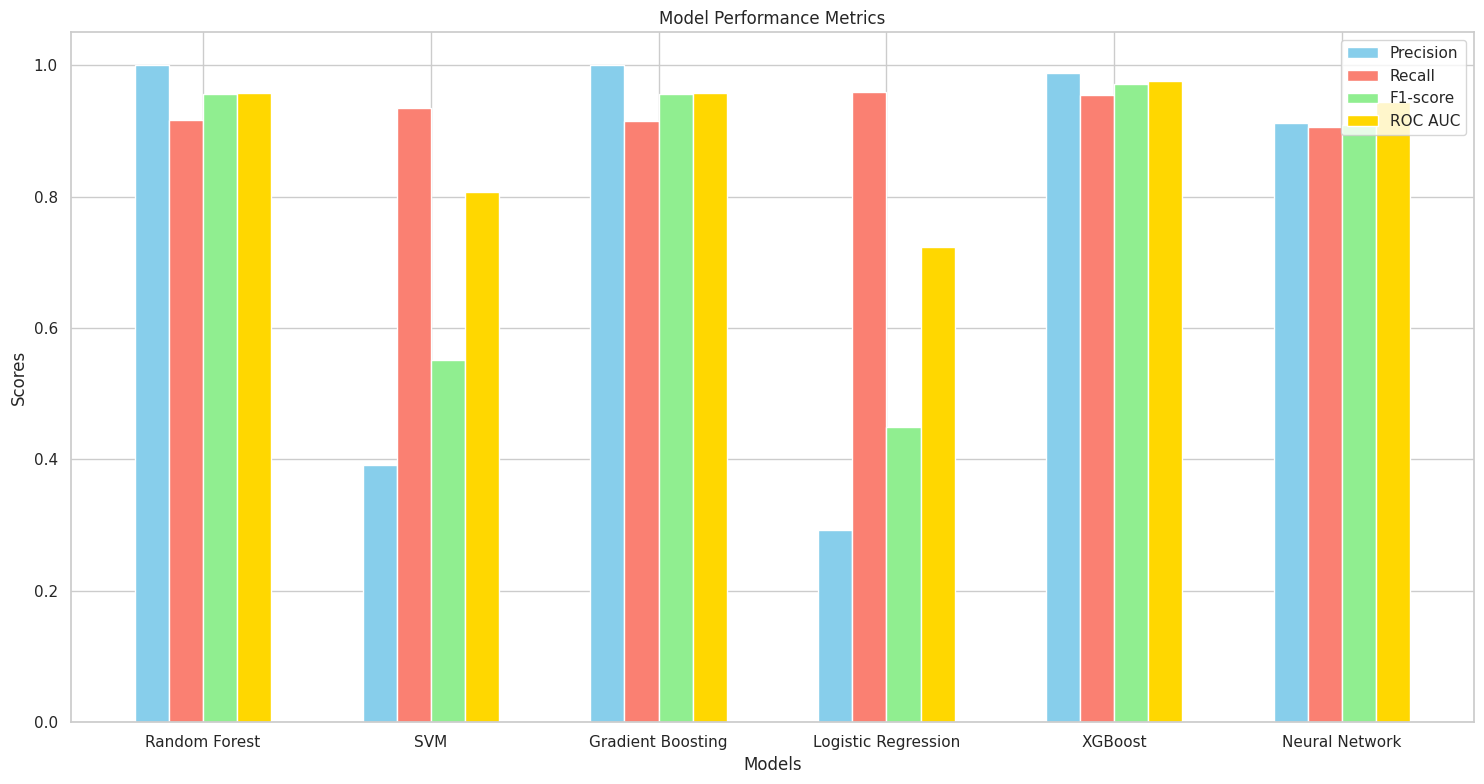

In [58]:
# Extract model names and metrics
model_names = list(results.keys())
metrics = list(results[model_names[0]].keys())

# Arrange the data for plotting
metric_values = {metric: [results[model][metric] for model in model_names] for metric in metrics}
x = np.arange(len(model_names))
bar_width = 0.15  # Width of the bars
colors = ['skyblue', 'salmon', 'lightgreen', 'gold']  # Colors for different metrics

# Plot grouped bars for each metric
plt.figure(figsize=(15, 8))

for i, (metric, color) in enumerate(zip(metrics, colors)):
    plt.bar(x + (i - 1.5) * bar_width, metric_values[metric], width=bar_width, label=metric, color=color)

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Metrics')
plt.xticks(x, model_names)
plt.legend(loc='upper right')
plt.tight_layout()
output_path = '/kaggle/working/model_performance_metrics.png'
plt.savefig(output_path, bbox_inches='tight')
plt.show()

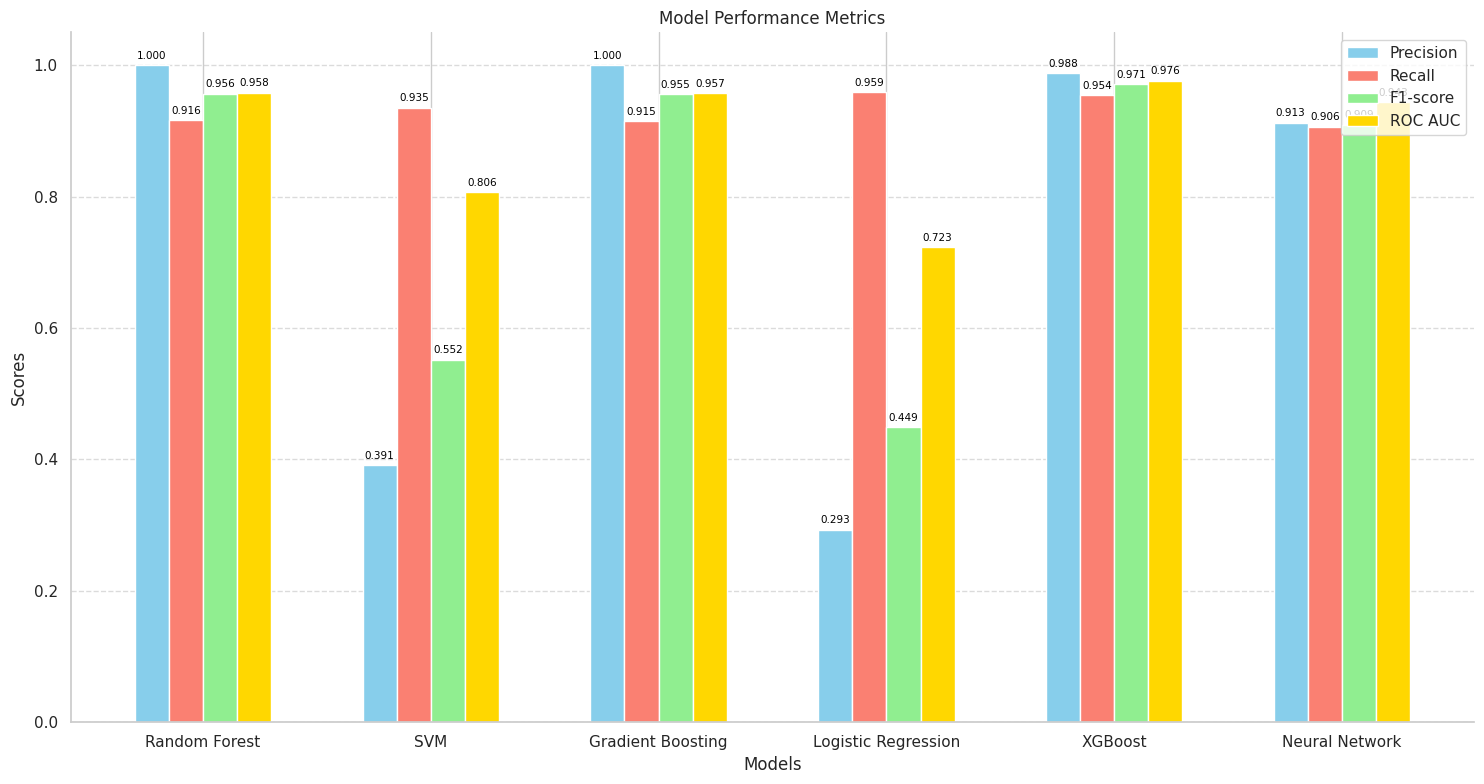

In [59]:


# Extract model names and metrics
model_names = list(results.keys())
metrics = list(results[model_names[0]].keys())

# Arrange the data for plotting
metric_values = {metric: [results[model][metric] for model in model_names] for metric in metrics}
x = np.arange(len(model_names))
bar_width = 0.15  # Width of the bars
colors = ['skyblue', 'salmon', 'lightgreen', 'gold']  # Colors for different metrics

# Plot grouped bars for each metric
fig, ax = plt.subplots(figsize=(15, 8))

for i, (metric, color) in enumerate(zip(metrics, colors)):
    ax.bar(x + (i - 1.5) * bar_width, metric_values[metric], width=bar_width, label=metric, color=color)

# Annotations and labels
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend(loc='upper right')

# Adding gridlines and removing spines
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adding data labels on top of bars
for i, metric in enumerate(metrics):
    for j, val in enumerate(metric_values[metric]):
        ax.text(j + (i - 1.5) * bar_width, val + 0.01, f'{val:.3f}', ha='center', color='black', fontsize=7.5)

plt.tight_layout()

# Save the plot
output_path = '/kaggle/working/model_performance_metrics2.png'
plt.savefig(output_path, bbox_inches='tight')

plt.show()


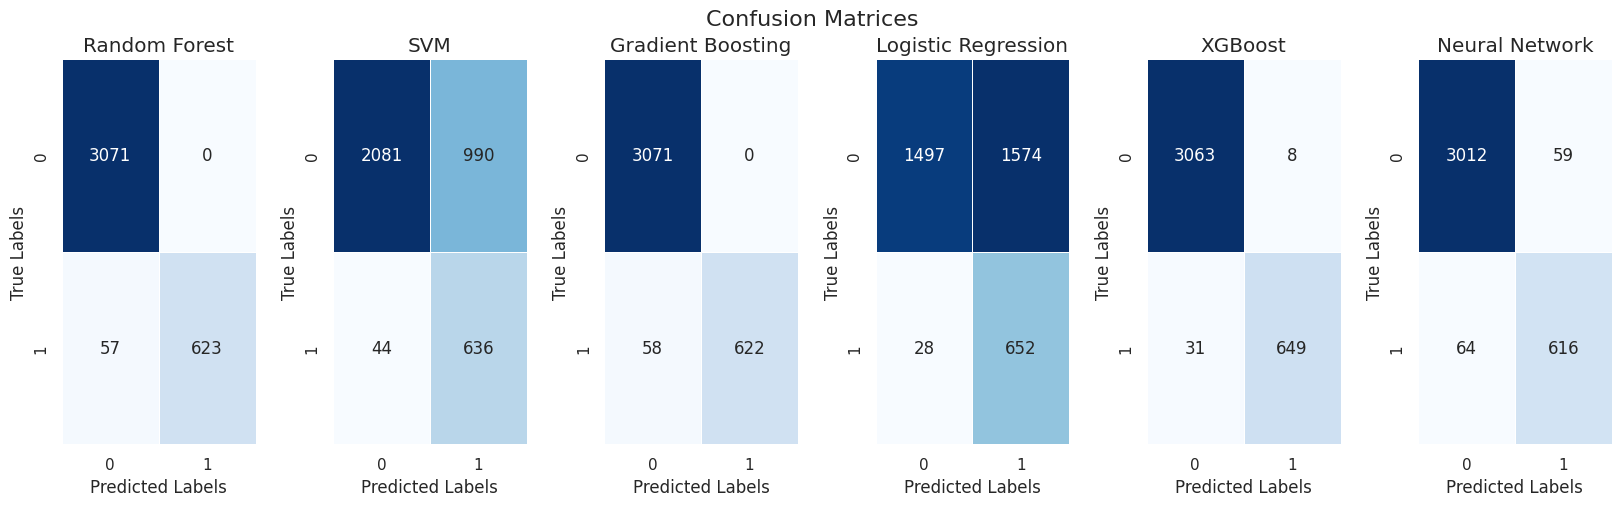

In [60]:
def plot_conf_matrix(y_test, rf_predictions, svm_predictions, gb_predictions, lr_predictions,xgboost_predictions,nn_predictions):
    # Create confusion matrices for each model
    rf_confusion = confusion_matrix(y_test, rf_predictions)
    svm_confusion = confusion_matrix(y_test, svm_predictions)
    gb_confusion = confusion_matrix(y_test, gb_predictions)
    lr_confusion = confusion_matrix(y_test, lr_predictions)
    xgboost_confusion = confusion_matrix(y_test, xgboost_predictions)
    nn_confusion = confusion_matrix(y_test, nn_predictions)

    # Create subplots for the confusion matrices
    fig, axs = plt.subplots(1, 6, figsize=(20, 5))
    fig.suptitle('Confusion Matrices', fontsize=16)

    # Adjust spacing between subplots
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    # Plot Random Forest Confusion Matrix
    sns.set(font_scale=1.2)
    sns.heatmap(rf_confusion, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 12}, linewidths=0.5, ax=axs[0])
    axs[0].set_title("Random Forest")
    axs[0].set_xlabel('Predicted Labels')
    axs[0].set_ylabel('True Labels')

    # Plot SVM Confusion Matrix
    sns.set(font_scale=1.2)
    sns.heatmap(svm_confusion, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 12}, linewidths=0.5, ax=axs[1])
    axs[1].set_title("SVM")
    axs[1].set_xlabel('Predicted Labels')
    axs[1].set_ylabel('True Labels')

    # Plot Gradient Boosting Confusion Matrix
    sns.set(font_scale=1.2)
    sns.heatmap(gb_confusion, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 12}, linewidths=0.5, ax=axs[2])
    axs[2].set_title("Gradient Boosting")
    axs[2].set_xlabel('Predicted Labels')
    axs[2].set_ylabel('True Labels')

    # Plot Logistic Regression Confusion Matrix
    sns.set(font_scale=1.2)
    sns.heatmap(lr_confusion, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 12}, linewidths=0.5, ax=axs[3])
    axs[3].set_title("Logistic Regression")
    axs[3].set_xlabel('Predicted Labels')
    axs[3].set_ylabel('True Labels')
    
    # Plot Neural Network Confusion Matrix
    sns.set(font_scale=1.2)
    sns.heatmap(xgboost_confusion, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 12}, linewidths=0.5, ax=axs[4])
    axs[4].set_title("XGBoost")
    axs[4].set_xlabel('Predicted Labels')
    axs[4].set_ylabel('True Labels')

    # Plot Neural Network Confusion Matrix
    sns.set(font_scale=1.2)
    sns.heatmap(nn_confusion, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 12}, linewidths=0.5, ax=axs[5])
    axs[5].set_title("Neural Network")
    axs[5].set_xlabel('Predicted Labels')
    axs[5].set_ylabel('True Labels')
    output_path = '/kaggle/working/confusion_matrices.png'
    plt.savefig(output_path, bbox_inches='tight')
    plt.show()

# Example usage
plot_conf_matrix(y_test, rf_predictions, svm_predictions, gb_predictions, lr_predictions,xgboost_predictions,nn_predictions)


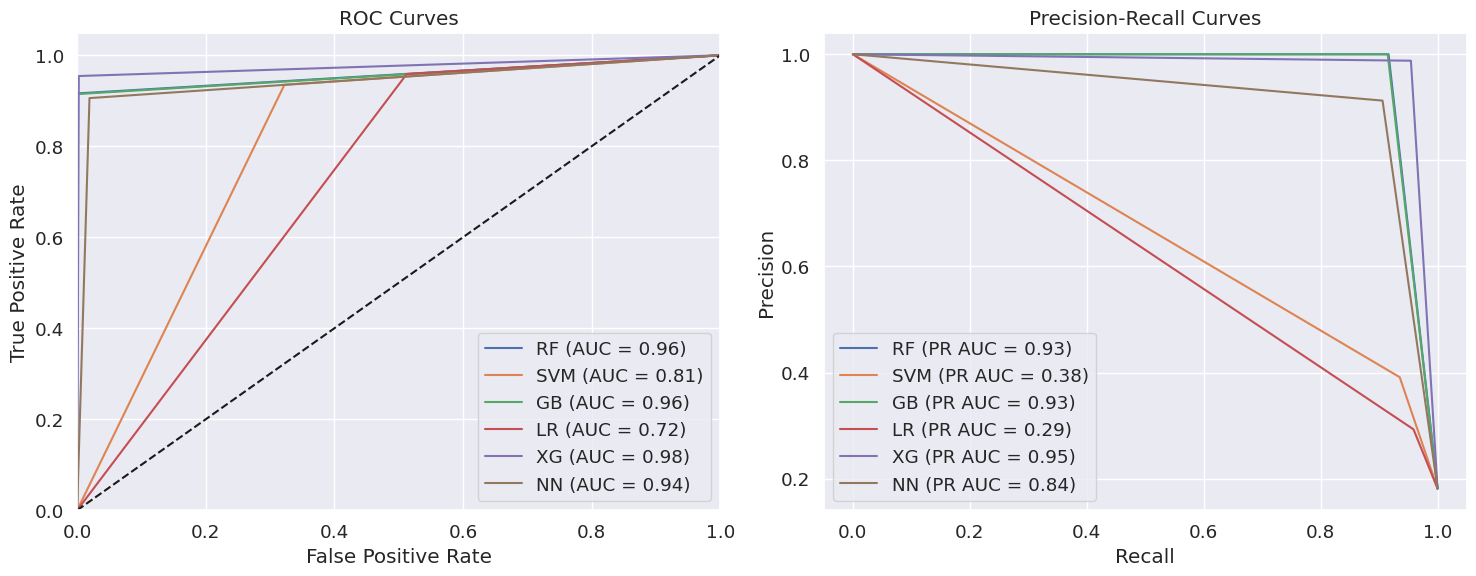

In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

def plot_roc_pr_curves(y_test, predictions_dict):
    plt.figure(figsize=(15, 6))

    # Plot ROC curves
    plt.subplot(1, 2, 1)
    for label, predictions in predictions_dict.items():
        fpr, tpr, _ = roc_curve(y_test, predictions)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend(loc='lower right')

    # Plot Precision-Recall curves
    plt.subplot(1, 2, 2)
    for label, predictions in predictions_dict.items():
        precision, recall, _ = precision_recall_curve(y_test, predictions)
        pr_auc = average_precision_score(y_test, predictions)
        plt.plot(recall, precision, label=f'{label} (PR AUC = {pr_auc:.2f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curves')
    plt.legend(loc='lower left')

    plt.tight_layout()
    output_path = '/kaggle/working/roc_pr_curves.png'
    plt.savefig(output_path, bbox_inches='tight')
    plt.show()

# Example usage
predictions_dict = {
    'RF': rf_predictions,
    'SVM': svm_predictions,
    'GB': gb_predictions,
    'LR': lr_predictions,
    'XG': xgboost_predictions,
    'NN': nn_predictions
}

plot_roc_pr_curves(y_test, predictions_dict)


In [62]:
rf_confusion = confusion_matrix(y_test, rf_predictions)
svm_confusion = confusion_matrix(y_test, svm_predictions)
gb_confusion = confusion_matrix(y_test, gb_predictions)
lr_confusion = confusion_matrix(y_test, lr_predictions)
xgboost_confusion = confusion_matrix(y_test, xgboost_predictions)
nn_confusion = confusion_matrix(y_test, nn_predictions)

def print_confusion_matrices_values(conf_matrices):
   
        # Extract values from the confusion matrix
        true_negatives = conf_matrices[0, 0]
        false_positives = conf_matrices[0, 1]
        false_negatives = conf_matrices[1, 0]
        true_positives = conf_matrices[1, 1]

        # Calculate the total number of instances
        total_instances = true_negatives + false_positives + false_negatives + true_positives

        # Print the description of the confusion matrix values
        #print(f"\nConfusion Matrix for {label}:")
        print(f"True Negatives (TN): {true_negatives} (Instances correctly predicted as 'normal')")
        print(f"False Positives (FP): {false_positives} (Instances incorrectly predicted as 'malicious')")
        print(f"False Negatives (FN): {false_negatives} (Instances incorrectly predicted as 'normal')")
        print(f"True Positives (TP): {true_positives} (Instances correctly predicted as 'malicious')")
        print(f"Total Instances: {total_instances}")
# Print the metrics for each model  
print("Random Forest Metrics:")    
print_confusion_matrices_values(rf_confusion)
print("\nSVM Metrics:")
print_confusion_matrices_values(svm_confusion)
print("\nGradient Boosting Metrics:")
print_confusion_matrices_values(gb_confusion)
print("\nLogistic Regression Metrics:")
print_confusion_matrices_values(lr_confusion)
print("\nXGBoost Metrics:")
print_confusion_matrices_values(xgboost_confusion)
print("\nNeural Network Model Metrics:")
print_confusion_matrices_values(nn_confusion)

Random Forest Metrics:
True Negatives (TN): 3071 (Instances correctly predicted as 'normal')
False Positives (FP): 0 (Instances incorrectly predicted as 'malicious')
False Negatives (FN): 57 (Instances incorrectly predicted as 'normal')
True Positives (TP): 623 (Instances correctly predicted as 'malicious')
Total Instances: 3751

SVM Metrics:
True Negatives (TN): 2081 (Instances correctly predicted as 'normal')
False Positives (FP): 990 (Instances incorrectly predicted as 'malicious')
False Negatives (FN): 44 (Instances incorrectly predicted as 'normal')
True Positives (TP): 636 (Instances correctly predicted as 'malicious')
Total Instances: 3751

Gradient Boosting Metrics:
True Negatives (TN): 3071 (Instances correctly predicted as 'normal')
False Positives (FP): 0 (Instances incorrectly predicted as 'malicious')
False Negatives (FN): 58 (Instances incorrectly predicted as 'normal')
True Positives (TP): 622 (Instances correctly predicted as 'malicious')
Total Instances: 3751

Logistic

In [63]:
df = pd.read_csv("/kaggle/input/plc-model8-test/plcdata.csv", encoding='ISO-8859-1')
df.head()

,PLC Current cycle time,PLC The shortest cycle time,PLC The longest cycle time,PLC Min runtime,PLC Max runtime,PLC Running Status,Current_time,Pump Speed,SG lEVEL,Year,Month,Day,Hour,Minute,Second,Millisecond,label
0,1011005,1001561,0,0,2063000,True,20:56.8,100.0,14.206157,2024,1,22,16,20,56,779,Normal
1,1137466,1001561,0,0,2063000,True,20:56.8,100.0,14.206157,2024,1,22,16,20,56,785,Normal
2,1010157,1001561,0,0,2063000,True,20:56.8,100.0,14.206157,2024,1,22,16,20,56,792,Normal
3,1021972,1001561,0,0,2063000,True,20:56.8,100.0,14.205319,2024,1,22,16,20,56,800,Normal
4,1032655,1001561,0,0,2063000,True,20:56.8,100.0,14.205319,2024,1,22,16,20,56,807,Normal


In [64]:
print(df['PLC Running Status'].value_counts())

PLC Running Status
True     20680
False     4321
Name: count, dtype: int64


In [65]:
numeric_columns = ['CycleTimeDifference','Pump Speed',
       'PLC Running Status','MaxRuntimeRatio','cycle_maxrun']
def preprocessing(df, numeric_columns):
    # Create a new column 'CycleTimeDifference' to store the differences in 'PLC Current cycle time'
    df['CycleTimeDifference'] = df['PLC Current cycle time'].diff()
    # Create a new column 'MaxRuntimeRatio' by dividing 'PLC Max runtime' by 'PLC Current cycle time'
    df['MaxRuntimeRatio'] = df['PLC Max runtime'] / df['PLC Current cycle time']

    df['longestimetimeRatio'] = df['PLC The longest cycle time'] / df['PLC Current cycle time']
      
    #df["sd_runtime_ratio"] = np.std(df["MaxRuntimeRatio"])

    # Ratio between Pump Speed and lEVEL
    #df["level_ratio"] = df["PLC Current cycle time"] / df["SG lEVEL"]

    # Ensure positive values for 'CycleTimeDifference' and 'MaxRuntimeRatio'
    df['CycleTimeDifference'] = df['CycleTimeDifference'].fillna(0).abs()  # Fill NaN (first row) with 0 and take absolute value
    df['MaxRuntimeRatio'] = df['MaxRuntimeRatio'].abs()  # Take absolute value for 'MaxRuntimeRatio'
    df['longestimetimeRatio'] = df['longestimetimeRatio'].abs()
    
    df['cycle_maxrun'] = df['CycleTimeDifference'] / df['MaxRuntimeRatio']
    
    
    # Replace NaN values with 0
    df.fillna(0, inplace=True)
    # Initialize LabelEncoder
    label_encoder = LabelEncoder()

    # Fit and transform the 'PLC Running Status' column
    df['PLC Running Status'] = label_encoder.fit_transform(df['PLC Running Status'])
    df['PLC Running Status'] = 1 - df['PLC Running Status']
    # Copy of dataframe
    data = df.copy()
    # Apply label encoding
    #data['PLC Running Status'] = data['PLC Running Status'].apply(lambda x: 0 if x == 8 else 1)
    # Convert labels to numeric form using label encoding
    #label_encoder = LabelEncoder()
    # Fit and transform the 'Label' column
    
    #data['label'] = label_encoder.fit_transform(data['label'])

    # Invert the labels
    #data['label'] = 1 - data['label']
    #y = data['label']
     # Drop non-numeric columns and convert IP columns to numerical form (using dummy variables)
    data = data[numeric_columns]
    dataframe = data.copy()
    
    # Convert the list to a NumPy array
    #labels = np.array(y)
    # Get values from dataset
    raw_data = data.values
    # Get values not last column which is target column
    data = raw_data[:, :-1]
    # Normalization of data
    data = ((data - data.min()) / (data.max() - data.min())) * 2
    return dataframe, data
#output of the function (dataframe)
dataframe,data = preprocessing(df,numeric_columns)
dataframe

,CycleTimeDifference,Pump Speed,PLC Running Status,MaxRuntimeRatio,cycle_maxrun
0,0.0,100.0,0,2.040544,0.000000
1,126461.0,100.0,0,1.813681,69726.169571
2,127309.0,100.0,0,2.042257,62337.410331
3,11815.0,100.0,0,2.018646,5852.932225
4,10683.0,100.0,0,1.997763,5347.481030
...,...,...,...,...,...
24996,1613.0,100.0,0,2.040215,790.602998
24997,1270.0,100.0,0,2.042781,621.701629
24998,328269.0,100.0,0,1.541661,212932.013050
24999,45520.0,100.0,0,1.595950,28522.196529


In [66]:
# Load your models
rf_model = load('/kaggle/working/random_forest_model.joblib')
svm_model = load('/kaggle/working/svm_model.joblib')
gb_model = load('/kaggle/working/gradient_boosting_model.joblib')
lr_model = load('/kaggle/working/logistic_regression_model.joblib')
xgboost_model = load('/kaggle/working/xgboost_model.joblib')

In [67]:
#storing data in X_new 
X_new = data

In [68]:
#testing new data
# Assuming X_new is your new dataset
rf_predictions = rf_model.predict(X_new)
svm_predictions = svm_model.predict(X_new)
gb_predictions = gb_model.predict(X_new)
lr_predictions = lr_model.predict(X_new)
xgboost_predictions = xgboost_model.predict(X_new)

In [69]:
# Load your Keras model
nn_model = tf.keras.models.load_model('/kaggle/working/neural_network_model.h5')
# Assuming X_new is your new dataset
nn_predictions = nn_model.predict(X_new)

782/782 [==============================] - 1s 1ms/step


In [70]:
# Create a DataFrame for predictions

predictions_df = pd.DataFrame({
    'RF_Predictions': rf_predictions,
    'SVM_Predictions': svm_predictions,
    'GB_Predictions': gb_predictions,
    'LR_Predictions': lr_predictions,
    'XGboost_Predictions': xgboost_predictions,
})

# Concatenate the predictions DataFrame with your new dataset
result_df = pd.concat([df, predictions_df], axis=1)
result_df

,PLC Current cycle time,PLC The shortest cycle time,PLC The longest cycle time,PLC Min runtime,PLC Max runtime,PLC Running Status,Current_time,Pump Speed,SG lEVEL,Year,...,label,CycleTimeDifference,MaxRuntimeRatio,longestimetimeRatio,cycle_maxrun,RF_Predictions,SVM_Predictions,GB_Predictions,LR_Predictions,XGboost_Predictions
0,1011005,1001561,0,0,2063000,0,20:56.8,100.0,14.206157,2024,...,Normal,0.0,2.040544,0.0,0.000000,1,1,0,1,0
1,1137466,1001561,0,0,2063000,0,20:56.8,100.0,14.206157,2024,...,Normal,126461.0,1.813681,0.0,69726.169571,0,0,1,0,0
2,1010157,1001561,0,0,2063000,0,20:56.8,100.0,14.206157,2024,...,Normal,127309.0,2.042257,0.0,62337.410331,1,0,1,0,0
3,1021972,1001561,0,0,2063000,0,20:56.8,100.0,14.205319,2024,...,Normal,11815.0,2.018646,0.0,5852.932225,1,1,1,1,0
4,1032655,1001561,0,0,2063000,0,20:56.8,100.0,14.205319,2024,...,Normal,10683.0,1.997763,0.0,5347.481030,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24996,1011168,1001561,0,0,2063000,0,23:45.9,100.0,14.794104,2024,...,Normal,1613.0,2.040215,0.0,790.602998,0,1,1,1,0
24997,1009898,1001561,0,0,2063000,0,23:45.9,100.0,14.794104,2024,...,Normal,1270.0,2.042781,0.0,621.701629,0,1,1,1,0
24998,1338167,1001561,0,0,2063000,0,23:45.9,100.0,14.794104,2024,...,Normal,328269.0,1.541661,0.0,212932.013050,0,0,1,0,0
24999,1292647,1001561,0,0,2063000,0,23:45.9,100.0,14.794104,2024,...,Normal,45520.0,1.595950,0.0,28522.196529,0,0,1,1,0


In [71]:
print(result_df['PLC Running Status'].value_counts())

PLC Running Status
0    20680
1     4321
Name: count, dtype: int64


In [72]:
# Assuming nn_predictions contains the continuous probabilities from your neural network model
threshold = 0.5
binary_predictions = (nn_predictions > threshold).astype(int)

# Convert predictions to DataFrame
nn_binary_predictions_df = pd.DataFrame(binary_predictions, columns=['NN_Binary_Predictions'])
# Concatenate the binary predictions DataFrame with your new dataset
result_df = pd.concat([result_df, nn_binary_predictions_df], axis=1)
result_df.head()

,PLC Current cycle time,PLC The shortest cycle time,PLC The longest cycle time,PLC Min runtime,PLC Max runtime,PLC Running Status,Current_time,Pump Speed,SG lEVEL,Year,...,CycleTimeDifference,MaxRuntimeRatio,longestimetimeRatio,cycle_maxrun,RF_Predictions,SVM_Predictions,GB_Predictions,LR_Predictions,XGboost_Predictions,NN_Binary_Predictions
0,1011005,1001561,0,0,2063000,0,20:56.8,100.0,14.206157,2024,...,0.0,2.040544,0.0,0.000000,1,1,0,1,0,1
1,1137466,1001561,0,0,2063000,0,20:56.8,100.0,14.206157,2024,...,126461.0,1.813681,0.0,69726.169571,0,0,1,0,0,0
2,1010157,1001561,0,0,2063000,0,20:56.8,100.0,14.206157,2024,...,127309.0,2.042257,0.0,62337.410331,1,0,1,0,0,0
3,1021972,1001561,0,0,2063000,0,20:56.8,100.0,14.205319,2024,...,11815.0,2.018646,0.0,5852.932225,1,1,1,1,0,0
4,1032655,1001561,0,0,2063000,0,20:56.8,100.0,14.205319,2024,...,10683.0,1.997763,0.0,5347.481030,1,1,1,1,0,0


In [73]:
result_df.columns

Index(['PLC Current cycle time', 'PLC The shortest cycle time',
       'PLC The longest cycle time', 'PLC Min runtime', 'PLC Max runtime',
       'PLC Running Status', 'Current_time', 'Pump Speed', 'SG lEVEL', 'Year',
       'Month', 'Day', 'Hour', 'Minute', 'Second', 'Millisecond', 'label',
       'CycleTimeDifference', 'MaxRuntimeRatio', 'longestimetimeRatio',
       'cycle_maxrun', 'RF_Predictions', 'SVM_Predictions', 'GB_Predictions',
       'LR_Predictions', 'XGboost_Predictions', 'NN_Binary_Predictions'],
      dtype='object')

In [74]:
output_df = result_df

In [75]:
output_df.columns

Index(['PLC Current cycle time', 'PLC The shortest cycle time',
       'PLC The longest cycle time', 'PLC Min runtime', 'PLC Max runtime',
       'PLC Running Status', 'Current_time', 'Pump Speed', 'SG lEVEL', 'Year',
       'Month', 'Day', 'Hour', 'Minute', 'Second', 'Millisecond', 'label',
       'CycleTimeDifference', 'MaxRuntimeRatio', 'longestimetimeRatio',
       'cycle_maxrun', 'RF_Predictions', 'SVM_Predictions', 'GB_Predictions',
       'LR_Predictions', 'XGboost_Predictions', 'NN_Binary_Predictions'],
      dtype='object')

In [76]:
plc_output_df = result_df

In [77]:
plc_output_df.to_csv('plc_output2_model8.csv', index=False)  # Save to a CSV file without including the index

In [78]:
# Assuming you have a DataFrame named 'output_df' containing the predictions
# Columns: 'RF_Predictions', 'SVM_Predictions', 'GB_Predictions', 'LR_Predictions', 'NN_Binary_Predictions'

# Count occurrences of 1 and 0 in each model's predictions
rf_counts = output_df['RF_Predictions'].value_counts()
svm_counts = output_df['SVM_Predictions'].value_counts()
gb_counts = output_df['GB_Predictions'].value_counts()
lr_counts = output_df['LR_Predictions'].value_counts()
XGboost_counts = output_df['XGboost_Predictions'].value_counts()
nn_counts = output_df['NN_Binary_Predictions'].value_counts()

# Print the counts
print("Random Forest Predictions:")
print(rf_counts)

print("\nSVM Predictions:")
print(svm_counts)

print("\nGradient Boosting Predictions:")
print(gb_counts)

print("\nLogistic Regression Predictions:")
print(lr_counts)

print("\nXGboost Predictions:")
print(XGboost_counts)

print("\nNeural Network Binary Predictions:")
print(nn_counts)


Random Forest Predictions:
RF_Predictions
0    15057
1     9944
Name: count, dtype: int64

SVM Predictions:
SVM_Predictions
1    14504
0    10497
Name: count, dtype: int64

Gradient Boosting Predictions:
GB_Predictions
1    19761
0     5240
Name: count, dtype: int64

Logistic Regression Predictions:
LR_Predictions
1    18898
0     6103
Name: count, dtype: int64

XGboost Predictions:
XGboost_Predictions
0    20680
1     4321
Name: count, dtype: int64

Neural Network Binary Predictions:
NN_Binary_Predictions
0    19897
1     5104
Name: count, dtype: int64


In [79]:
output_df.columns

Index(['PLC Current cycle time', 'PLC The shortest cycle time',
       'PLC The longest cycle time', 'PLC Min runtime', 'PLC Max runtime',
       'PLC Running Status', 'Current_time', 'Pump Speed', 'SG lEVEL', 'Year',
       'Month', 'Day', 'Hour', 'Minute', 'Second', 'Millisecond', 'label',
       'CycleTimeDifference', 'MaxRuntimeRatio', 'longestimetimeRatio',
       'cycle_maxrun', 'RF_Predictions', 'SVM_Predictions', 'GB_Predictions',
       'LR_Predictions', 'XGboost_Predictions', 'NN_Binary_Predictions'],
      dtype='object')

In [80]:
output_df['label']

0        Normal
1        Normal
2        Normal
3        Normal
4        Normal
          ...  
24996    Normal
24997    Normal
24998    Normal
24999    Normal
25000    Normal
Name: label, Length: 25001, dtype: object

In [81]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# Assuming you have a DataFrame named 'output_df' with columns:
# 'RF_Predictions', 'SVM_Predictions', 'GB_Predictions', 'LR_Predictions', 'XGboost_Predictions', 'NN_Binary_Predictions', 'Actual_Labels'

# Define a list of model names
model_names = ['RF_Predictions', 'SVM_Predictions', 'GB_Predictions', 'LR_Predictions', 'XGboost_Predictions', 'NN_Binary_Predictions']

# Loop through each model
for i, model_name in enumerate(model_names):
    # Get the predictions and actual labels for the current model
    predictions_col = f'{model_name}'
    actual_labels = output_df['label']
    predictions = output_df[predictions_col]

    # Convert predicted labels to strings
    predictions = predictions.map({0: 'Normal', 1: 'Abnormal'})

    # Create a confusion matrix
    confusion_mat = confusion_matrix(actual_labels, predictions)

    # Print confusion matrix
    print(f"\nConfusion Matrix for {model_name}:")
    print(pd.DataFrame(confusion_mat, index=['Actual Normal', 'Actual Abnormal'], columns=['Predicted Normal', 'Predicted Abnormal']))

    # Generate and print classification report
    classification_rep = classification_report(actual_labels, predictions)
    print(f"\nClassification Report for {model_name}:")
    print(classification_rep)



Confusion Matrix for RF_Predictions:
                 Predicted Normal  Predicted Abnormal
Actual Normal                3630                 901
Actual Abnormal              6314               14156

Classification Report for RF_Predictions:
              precision    recall  f1-score   support

    Abnormal       0.37      0.80      0.50      4531
      Normal       0.94      0.69      0.80     20470

    accuracy                           0.71     25001
   macro avg       0.65      0.75      0.65     25001
weighted avg       0.84      0.71      0.74     25001


Confusion Matrix for SVM_Predictions:
                 Predicted Normal  Predicted Abnormal
Actual Normal                4313                 218
Actual Abnormal             10191               10279

Classification Report for SVM_Predictions:
              precision    recall  f1-score   support

    Abnormal       0.30      0.95      0.45      4531
      Normal       0.98      0.50      0.66     20470

    accuracy         

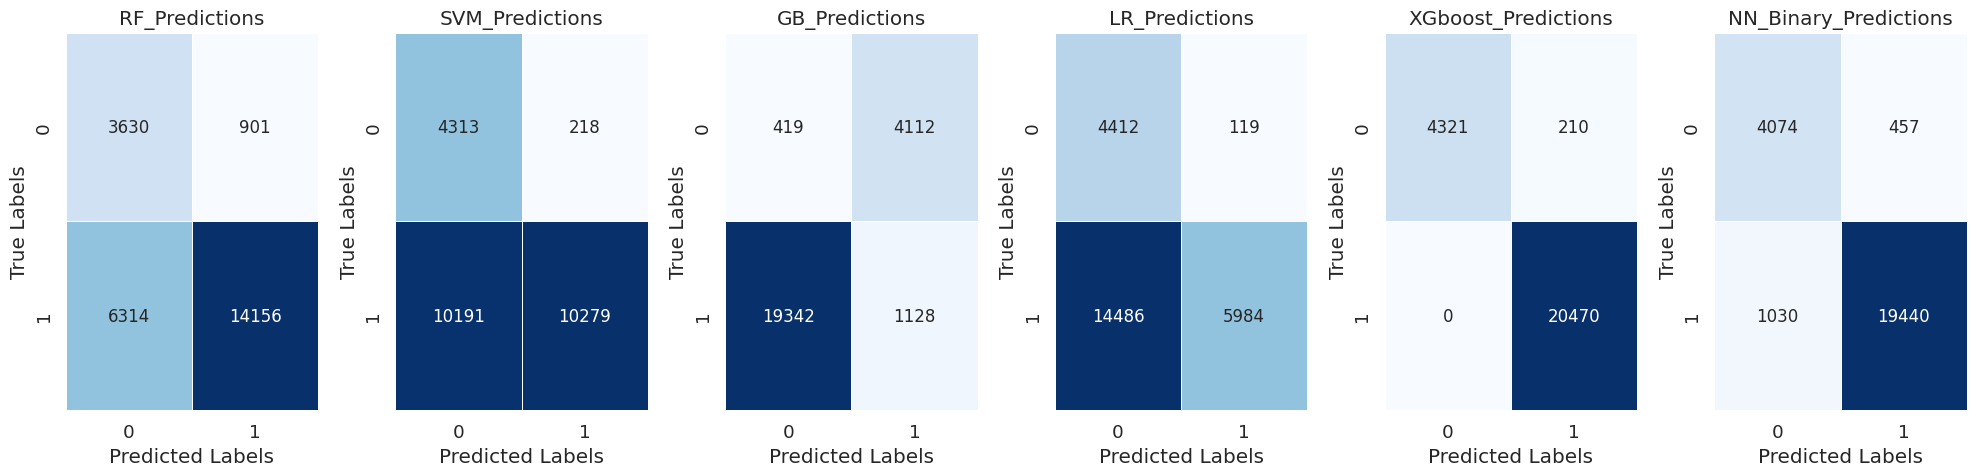

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd

# Assuming you have a DataFrame named 'output_df' with columns:
# 'RF_Predictions', 'SVM_Predictions', 'GB_Predictions', 'LR_Predictions', 'XGboost_Predictions', 'NN_Binary_Predictions', 'Actual_Labels'

# Define a list of model names
model_names = ['RF_Predictions', 'SVM_Predictions', 'GB_Predictions', 'LR_Predictions', 'XGboost_Predictions', 'NN_Binary_Predictions']

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=len(model_names), figsize=(20, 5))

# Loop through each model
for i, model_name in enumerate(model_names):
    # Get the predictions and actual labels for the current model
    predictions_col = f'{model_name}'
    actual_labels = output_df['label']
    predictions = output_df[predictions_col]

    # Convert predicted labels to strings
    predictions = predictions.map({0: 'Normal', 1: 'Abnormal'})

    # Create a confusion matrix
    confusion_mat = confusion_matrix(actual_labels, predictions)

    # Plot confusion matrix using seaborn
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 12}, linewidths=0.5, ax=axes[i])
    axes[i].set_title(f'{model_name}')
    axes[i].set_xlabel('Predicted Labels')
    axes[i].set_ylabel('True Labels')

# Adjust layout
plt.tight_layout()

# Save the plot
output_path = '/kaggle/working/model_performance_metrics3.png'
plt.savefig(output_path, bbox_inches='tight')
plt.show()
